<a href="https://colab.research.google.com/github/FwesleyAC/data_science/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Amsterdam*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Tudo isso **sem possuir um único hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Amstedam, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados utilizados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
Para esta análise exploratória inicial será baixado apenas o seguinte arquivo:
* listings.csv: Summary information and metrics for listings in Amsterdam (good for visualisations).

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings.csv")

## Análise dos Dados
Nesta etapa temos como objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada 
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - nome do anfitrião
* neighbourhood_group - esta coluna não possui valor válido
* noighbourhood - nome do bairro
* latitute - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipe de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade miníma de noites para reservar
* number_of_reviews - número de reviews que a propriedade possuí
* last_review - data da última review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 
365 dias (1 ano)


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,279,2019-11-21,2.88,1,132,1,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,106,1,339,2020-03-27,3.68,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,100,14,5,2020-01-02,0.12,1,57,0,NaN
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,221,2020-07-25,2.14,1,182,2,0363 974D 4986 7411 88D8
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,343,2020-02-06,4.53,2,295,10,0363 607B EA74 0BD8 2F6F


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis: \t {}\n'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 16478
Variáveis: 	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente ligada à quantidade de valores ausentes. É importante entender logo no ínicio se esses valores nulos são significativos comparados ao total de entradas.
* É possível ver a coluna nighbourhood_group possui 100 dos seus favores ausentes.
* As variáveis reviews_per_month e last_review possuem valores nulos em quase metade das linhas.
* As variáveis name e host_name tem aproximadamente 0,1% dos valores nulos.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape [0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.749059
reviews_per_month                 0.137092
last_review                       0.137092
host_name                         0.003338
name                              0.001881
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição de variáveis, irei utilizar o histograma.

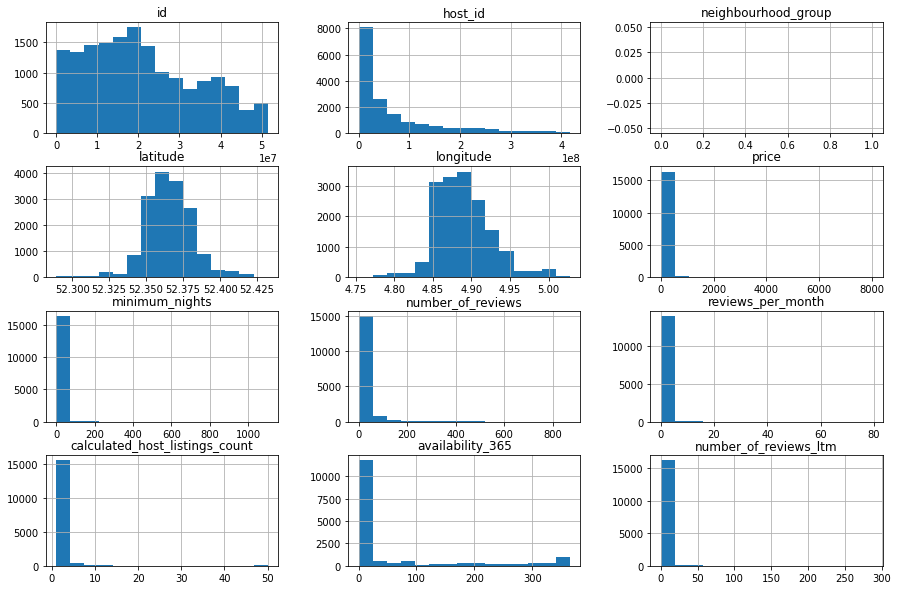

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize = (15, 10));

### **Q4. Há outliers presentes?**
Pela distribuição do histograma, é possivel verificar incícios de presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas de auxiliam a detecção de outliers. São elas:
* Resumo estatistístico por meio do método describe()
* Plotar boxplot para a variável.

In [11]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]. describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16478.000000,16478.000000,16478.000000,14219.000000,16478.000000,16478.000000
mean,156.873225,3.934337,24.295181,0.636915,1.768418,57.931484
std,173.111294,19.445875,56.040299,1.410119,3.544618,110.056511
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,96.000000,2.000000,2.000000,0.110000,1.000000,0.000000
50%,130.000000,2.000000,8.000000,0.270000,1.000000,0.000000
75%,180.000000,3.000000,21.000000,0.610000,1.000000,54.000000
max,8000.000000,1100.000000,871.000000,79.290000,50.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:
* A variável price possui 75% do valor abaixo de 180, porém seu valor máximo é de 8000.
* A quantidade mínima de noites (minimum_nights) está acima de 365

# Boxplot para minimum_nights

minimum_nights: valores acima de 30:
92 entradas
0.5583%


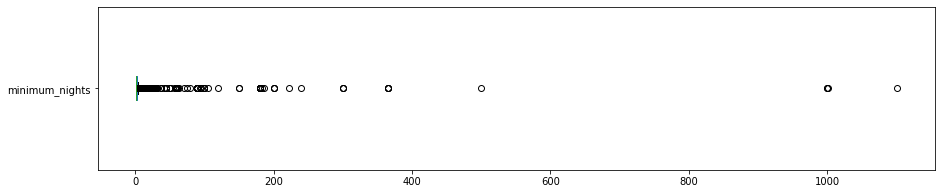

In [12]:
# minimum_nights
df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15,3))
plt.show

#ver a quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

# Boxplot para price


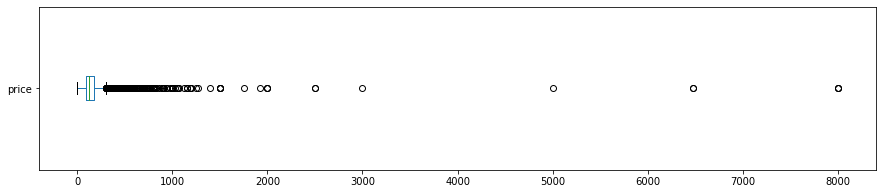


price: Valores acima de 1500
0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.0008496176720475786 entradas0.00084961

In [14]:
# price
df.price.plot(kind = 'box', vert=False, figsize = (15, 3),)
plt.show()

# Ver quantidade de valores acima de 1500 para price
print('\nprice: Valores acima de 1500')
print('{} entradas'.format(len(df[df.price > 1500]) / df.shape[0])*100)


# Histogramas sem outliers
Devido a ter sido identificado outliers nas variáveis price e minimum_nights, vamos agosra limpar o DataFrame delas e plotar novamente o histograma

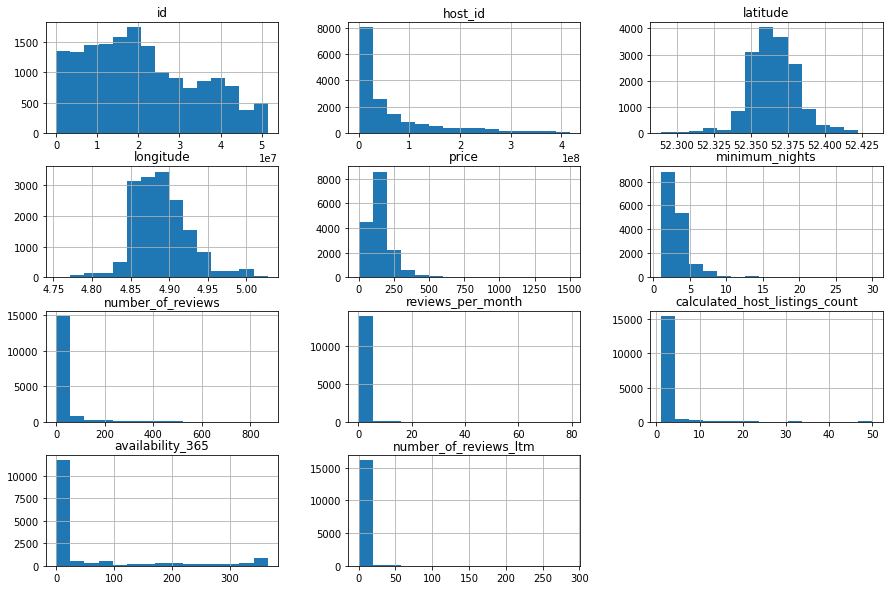

In [18]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

#remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins = 15, figsize = (15, 10));

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é a função dos coeficiente de correlação qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:
* Criar uma matriz de correlação
* Gerar um heatmap a partiri dessa matriz, usando a biblioteca seaborn

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.019165,-0.100825,-0.090274,0.009364,0.152939
minimum_nights,0.019165,1.000000,-0.073792,-0.091358,-0.022345,-0.011206
number_of_reviews,-0.100825,-0.073792,1.000000,0.612436,-0.001933,0.254370
reviews_per_month,-0.090274,-0.091358,0.612436,1.000000,0.059863,0.291038
calculated_host_listings_count,0.009364,-0.022345,-0.001933,0.059863,1.000000,0.122533
availability_365,0.152939,-0.011206,0.254370,0.291038,0.122533,1.000000


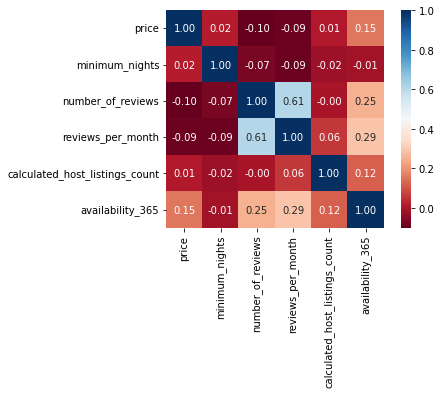

In [23]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]. corr()

display(corr)
# mostrar a matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna de variável room_type indica o tipo de locação que está sendo anunciada pelo Airbnb. Quem já alogou algum imóvel pelo site sabe que existe alguns tipos de imóveis disponíveis, seja ele apartamentos/casas inteiras, apenas quarto e dividir quarto com outra pessoal.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [24]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    12750
Private room        3469
Hotel room           110
Shared room           44
Name: room_type, dtype: int64

In [25]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.778721
Private room       0.211873
Hotel room         0.006718
Shared room        0.002687
Name: room_type, dtype: float64

Assim podemos ver que mais 70% dos imóveis são para locação dele completo, e seguido por 21% para quarto privados. Assim se estiver pensando em visitar Amsterdam saiba que será muito mais fácil locar o imóvel completo.

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se veridicar uma variável em função de outra é usando o grupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [27]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Centrum-Oost                              181.932520
Centrum-West                              181.228943
Zuid                                      170.175468
IJburg - Zeeburgereiland                  165.603015
De Pijp - Rivierenbuurt                   159.120500
Oud-Noord                                 158.663551
Watergraafsmeer                           150.645923
Westerpark                                150.033198
De Baarsjes - Oud-West                    147.132944
Oud-Oost                                  144.555246
Buitenveldert - Zuidas                    142.609442
Geuzenveld - Slotermeer                   140.565657
De Aker - Nieuw Sloten                    138.285714
Noord-Oost                                131.902542
Oostelijk Havengebied - Indische Buurt    131.386719
Noord-West                                129.398204
Bos en Lommer                             125.663848
Slotervaart                               117.661157
Osdorp                          

Acima, vemos que bairros como Centrum Oost, Centrum West e Zuid são mais caros de se hsopedar

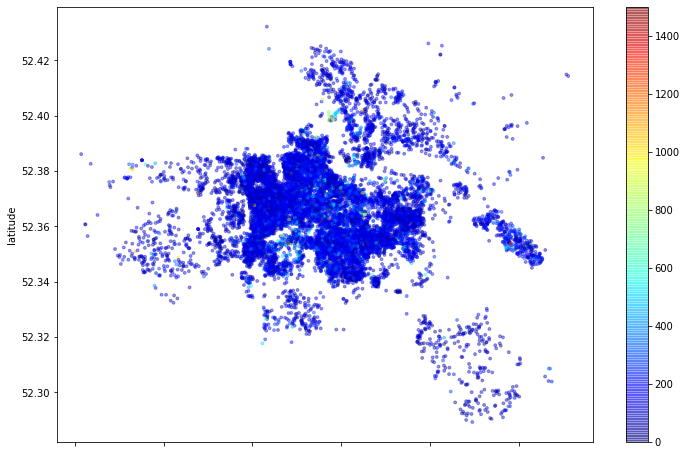

In [29]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize = (12,8));


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já foi possível perceber que existem outliers em alguma variáveis. 

Também notou-se que em algumas localidades há poucos imóveis diponíveis, o que pode distorcer as informações estatisticas de alguns atributos, tais como preço médio de locação.

Por fim, lembrar-se que este dataset é uma versão resumida, ideal apenas para abordagem inicial. Recomenda-se que seja usado, um uma próxima análise exploratória, o conjunto de dados completos.